In [326]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [327]:
path=r"D:\4_Intensity Transformation and Spatial Filtering\4_Codes_Images\IMG0_D.jpg"

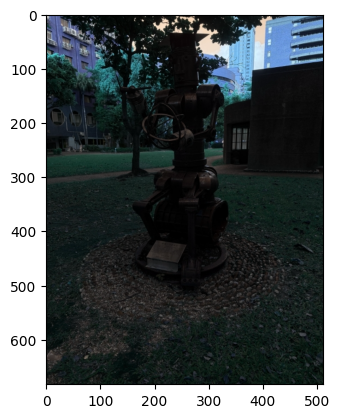

In [328]:
src=cv2.imread(path)
plt.imshow(src)

In [ ]:
# 定義伽馬值
gamma = 0.8

hsv_init=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
channel_gamma=cv2.split(hsv_init)

v_normalized = channel_gamma[2].astype(np.float32) / 255.0  # 轉 float，正規化 [0,1] 
v_powered = np.power(v_normalized, gamma)  # power，float32
v_equal = np.uint8(v_powered * 255)


hsv_gamma=cv2.merge([channel_gamma[0],channel_gamma[1],v_equal])
src_gamma=cv2.cvtColor(hsv_gamma,cv2.COLOR_HSV2RGB)

Text(0.5, 1.0, 'Gamma = 0.5')

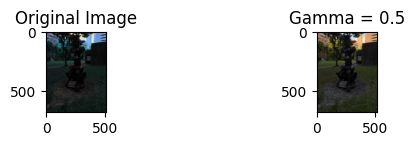

In [330]:
plt.subplot(4,2,1)
plt.imshow(src)
plt.title('Original Image')

plt.subplot(4,2,2)
plt.imshow(src_gamma)
plt.title('Gamma = 0.5')

In [331]:
new_src=np.zeros(src.shape,src.dtype)

contrast=1.2
brightness=50

for x in range(src.shape[0]):
	for y in range(src.shape[1]):
		new_src[x][y]=np.clip(src[x][y]*contrast + brightness, 0, 255)


Text(0.5, 1.0, 'Contrast = 1.2, Brightness = 50')

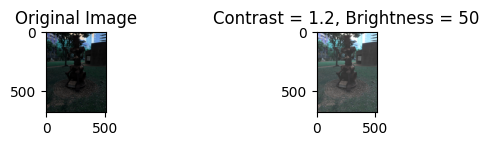

In [332]:
plt.subplot(4,2,3)
plt.imshow(src)
plt.title('Original Image')

plt.subplot(4,2,4)
plt.imshow(new_src)
plt.title('Contrast = 1.2, Brightness = 50')

In [333]:
hsv_equal=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
channel_equal=cv2.split(hsv_equal)

v_equal=cv2.equalizeHist(channel_equal[2])
hsv_equal=cv2.merge([channel_equal[0],channel_equal[1],v_equal])
src_equal=cv2.cvtColor(hsv_equal,cv2.COLOR_HSV2RGB)

Text(0.5, 1.0, 'Histogram Equalization')

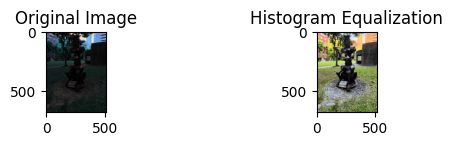

In [334]:
plt.subplot(4,2,5)
plt.imshow(src)
plt.title('Original Image')

plt.subplot(4,2,6)
plt.imshow(src_equal)
plt.title('Histogram Equalization')

In [335]:
c=1.0
rate=0.5

In [336]:
hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
channel=cv2.split(hsv)

src_power_law=c*(channel[2]**rate)
src_power_law=cv2.merge(channel,hsv)
src_power_law=cv2.cvtColor(src_power_law,cv2.COLOR_HSV2RGB)

Text(0.5, 1.0, 'power law')

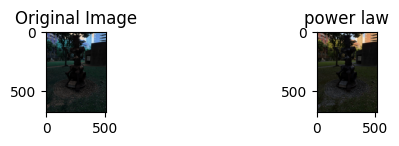

In [337]:
plt.subplot(4,2,7)
plt.imshow(src)
plt.title('Original Image')

plt.subplot(4,2,8)
plt.imshow(src_power_law)
plt.title('power law')